# Introduction

![titanic](images/nb-1-titanic.jpg)

On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.

Today, we attempt to predict which passenger survived the accident and who couldn't from various features given to us like age, sex, etc. We'll be using the dataset provided by **Kaggle**: [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic)

In [56]:
import pandas as pd
import numpy as np

In [57]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Peeking a.k.a Data Decription

Features that are present in the dataset from (https://www.kaggle.com/c/titanic/data). 
* Survived: Did the passenger survived (YES=1/NO=0)
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex: Gender of the passenger (male/female)
* Age: Age in years (aka years on this planet :) )
* SibSp: # of siblings / spouses aboard the Titanic. The dataset defines family relations in this way...
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: # of parents / children aboard the Titanic
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number
* Fare: Passenger fare
* Cabin: Cabin number
* Embarked: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton)


Lets look at general information about our data. Focussing on total entries and data-types of different features.

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Observervation ?

We observe that **Age** and **Cabin** columns/features have missing values (in case of cabin: a lot of missing values). 

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


WE can see that ~ 38.3 % of the passenger's on board survived. To get a clear description for categorical features in teh data.

In [7]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Petroff, Mr. Nedelio",male,347082,G6,S
freq,1,577,7,4,644


**Cabin** has a lot of missing values (204 out of 891), thus its good idea to drop that feature. Also Note that **ticket** has too many unique values (681 unique values out of 891) thus we will be dropping that feature too. Lastly, **names**(and **passengerID**) are not a helful feature, so we can drop those too

In [59]:
train_data = train_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train_data.head() # take a peek

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Data Visualization and Exploration

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

Let's plot the number of folks who survived and who died.

Text(0.5,1,'Distribution of Survival, (1=Survivied, 0 = Died)')

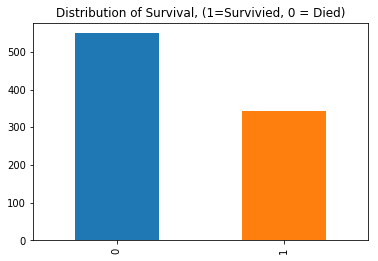

In [11]:
train_data.Survived.value_counts().plot(kind='bar')
plt.title("Distribution of Survival, (1=Survivied, 0 = Died)")

What do your eyes see ? over 500 people died and over 300 and less than 400 people died

How does age and gender of a person affet the survival chances ?

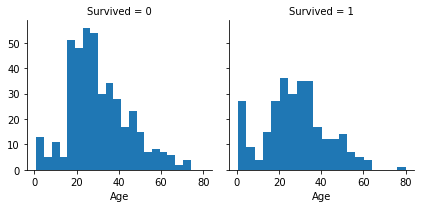

In [25]:
age = sns.FacetGrid(train_data, col='Survived')
age.map(plt.hist,'Age',bins=20)

# gender=sns.FacetGrid(train_data, col='Survived')
# gender.map(plt.hist, 'Sex', bins=3)

In [22]:
# age.map?
sns.__version__

'0.8.1'

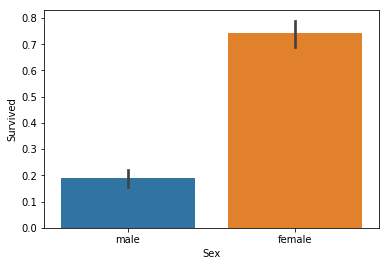

In [26]:
sns.barplot(x='Sex', y='Survived', data=train_data)

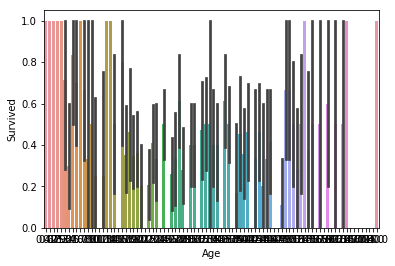

In [27]:
sns.barplot(x='Age', y='Survived', data=train_data)

In [29]:
sns.axisgrid?

/home/prakush/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


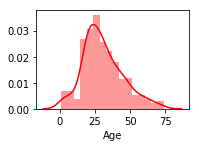

In [31]:
sns.distplot(train_data.loc[train_data.Survived==0, 'Age'].dropna(),color='red', label='Not Survived', ax=plt.subplot(222));

/home/prakush/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


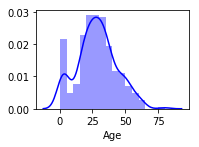

In [32]:
sns.distplot(train_data.loc[train_data.Survived==1, 'Age'].dropna(),color='blue', label='Not Survived', ax=plt.subplot(222));

The plots shows that survival and age has high correlation. People from age ground of 25 to 30 died.  Death rate for people between age 50 to 65 was lower than the survival rate. 
Also, NOTE: many more male passengers died in comparison to female passengers.

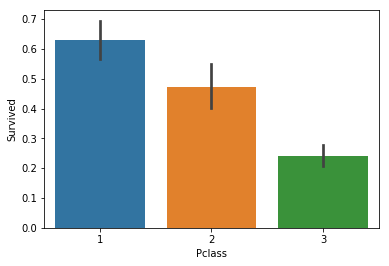

In [33]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

Text(0.5,1,'Pclass distribution')

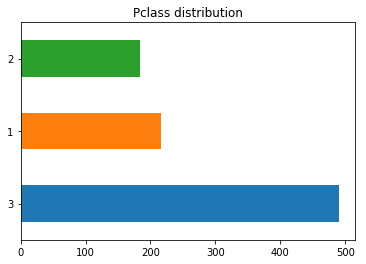

In [34]:
train_data.Pclass.value_counts().plot(kind='barh')
plt.title("Pclass distribution")

Looking at the above plot there were more people from class 3, so we might infer that more people from class 3 might have died. However, is death rate proportinally distributed based on Pclass? Let's find out

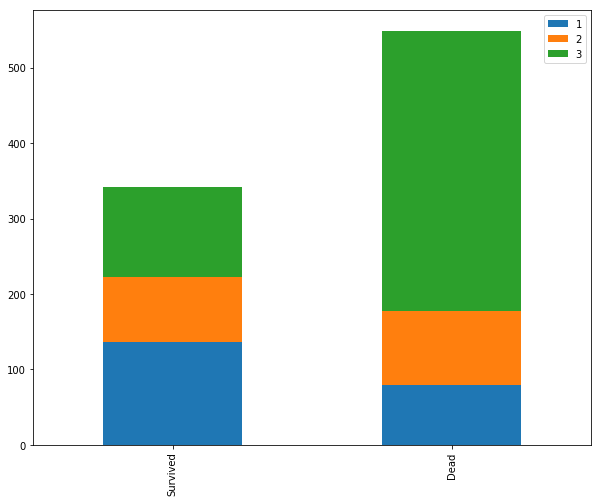

In [38]:
pclass_survived = train_data[train_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = train_data[train_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived, pclass_dead])
df.index= ['Survived', 'Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

Above figure shows that, the death rte was not proportinally distributed among classes. We can celarly see that people from first and second class had higher survival rate than those from third class.

Let's now do a similar analysis based on the port from where people embarked. 

Text(0.5,1,'Passengers per boarding location')

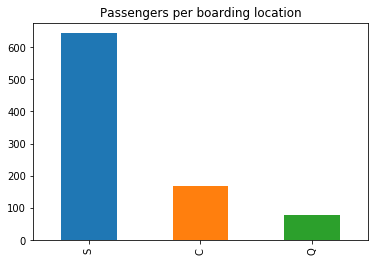

In [39]:
train_data.Embarked.value_counts().plot(kind='bar')
plt.title("Passengers per boarding location")

Text(0.5,1,'Survival and death at Different ports')

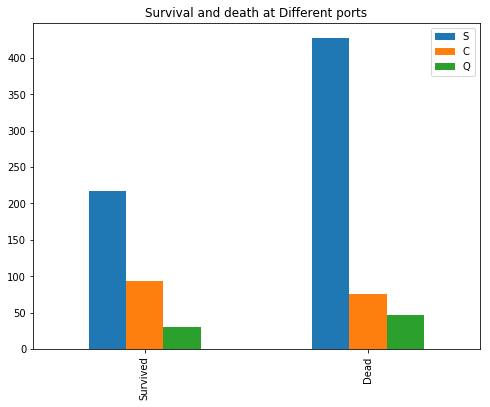

In [42]:
survived =train_data[train_data['Survived']==1]['Embarked'].value_counts()
dead = train_data[train_data['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=False, figsize=(8,6))
plt.title("Survival and death at Different ports")

We can see that the survival was affected by the port from where they embarked.

Lastly, lets visualize the relation between ticket fare a passenger paid and how it affected their chance of survival. We plot the mean fare for two classes of **Survived** feature.

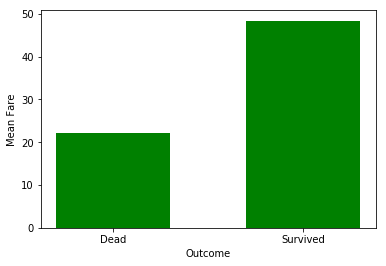

In [44]:
survived_0 = train_data[train_data['Survived']==0]["Fare"].mean()
survived_1 = train_data[train_data['Survived'] == 1]["Fare"].mean()
xs  = [survived_0, survived_1]
ys = ['Dead','Survived']
plt.bar(ys, xs, 0.6, align='center',color = 'green')
plt.xlabel('Outcome')
plt.ylabel('Mean Fare')
plt.show()

What do we observer ? that higher fare paying passenger have better change of survival.

## Data wrangling: Convert categorical variables to intergers

We need to conver the categorical features of our dataset to integer variables. This will make things like calculating correlations easier and will also conver data into a format easier to process for machine learning algorithms.

**Sex**: we map **female** = **1** and **male** = **0**.     
We need to convert the categories of **Embarked** into numerical data. We will divide the embarked column into three columns: (1) Embarked_C, (2) Embarked_Q (3) Embarked_S and values will be eigher 1/0 depending on whether the passenger were from that port or not. Note that 2 values are missing (889 values available while it should be 891) but its okay (Since it's just 2 out of 891).

In [60]:
def convert(dataset):
    # {male, female} = {0,1}
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
    
    # embarked(S, C, Q) converted to 3 binary variables
    embarked_separate_port = pd.get_dummies(dataset['Embarked'], prefix='Embarked')
    dataset = pd.concat([dataset, embarked_separate_port], axis=1)
    return dataset.drop('Embarked', axis=1)

In [61]:
train_data = convert(train_data)
test_data = convert(test_data)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


## Correlation Analysis
**NOTE to self: explain Correlation**

Let's calculate correlations between every parr of features( and survived variable)

In [62]:
corr = train_data.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.081720
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.082853,0.074115,-0.125722
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.036261,-0.022405,-0.032523
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.070941
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.063036
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,0.168240,-0.243292,0.082853,0.036261,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,0.074115,-0.022405,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.125722,-0.032523,0.070941,0.063036,-0.166603,-0.778359,-0.496624,1.000000


Lets visualize this for clarity. We do this my using **heatmap**. For this, we use absolute values of the correlation, this means, variables/features having  values close to 0 appear dark, and everything which is correlated(or anticorrelated ) is bright. The shades of the color gives the relative strength of correlation

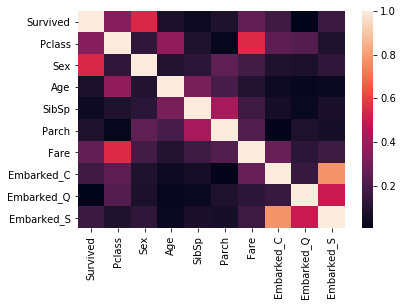

In [63]:
sns.heatmap(np.abs(corr), xticklabels=corr.columns, yticklabels=corr.columns)

We observe that **Pclass**, **Age**, and **Fare** have significant correlation(or anticorrelation) with **Survived**. Although, **Pclass** and **Fare** are quite correlated with each other so the information content between the two variable might be overlapping. Also, noting **Embarked_C**, **Embarked_S** are also important variables/features

## Data Wrangling

A process of cleaning and uniting messy and complex data-set for easy accessing and analysis. We have seen some clearning already.

### Filling missing values

In [64]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.4 KB


We'll fill incomplete values of age. We will do that by calculating the meadian, value found by using age values for different sex and class. As we have two sexes(1,0) and three classes (1,2,3) we have 6 combinatoins and we will calculate the age from each combination

In [66]:
x = train_data
xx = test_data

In [67]:
guess_ages =  np.zeros((2,3))
for i in range(0,2):
    for j in range(0,3):
        guess_data= train_data[(train_data['Sex']==i)&(train_data['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median()
        
        # conver random age to nearest 0.5 age
        guess_ages[i,j] = int( age_guess/0.5 + 0.5) * 0.5

def wrangle_age(dataset):
    for i in range(0,2):
        for j in range(0,3):
             dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset
            

In [68]:
train_data = wrangle_age(train_data)
test_data = wrangle_age(test_data)

In [69]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(1), int64(6), uint8(3)
memory usage: 51.4 KB


## Creating new Features

Two features **SibSp** and **Parch** both refer to family members. So we will create a new feature called **FamilySize** by adding **SibSp** and **Parch**. We will also add 1 as a family should have at least 1 member.

In [70]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp']+ test_data['Parch'] + 1

## Final look before applying machine learning

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
FamilySize    891 non-null int64
dtypes: float64(1), int64(7), uint8(3)
memory usage: 58.4 KB


In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          417 non-null float64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
FamilySize    418 non-null int64
dtypes: float64(1), int64(6), uint8(3)
memory usage: 24.2 KB


For test data , we found that **Fare** (417 out of 418) lacks one value.
So, we will assign the mean fare(which is 32) that we can observe to the missing Fare.

In [74]:
test_dataNew = test_data

In [75]:
mean_fare = 32
test_dataNew['Fare'] = test_dataNew['Fare'].fillna(mean_fare)

In [76]:
test_dataNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Sex           418 non-null int64
Age           418 non-null int64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
FamilySize    418 non-null int64
dtypes: float64(1), int64(6), uint8(3)
memory usage: 24.2 KB


# Machine Learning Models: Training and Evaluation

We will now build models to make prediction based on our data. We will be using 6 classification algorithms
1. Logistic Regression
2. Support Vector Machines
3. Naive Bayes
4. Decision Trees
5. Random Forest
6. Xgboost

In [77]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [79]:
import xgboost as xgb

In [80]:
X_train = train_data.drop("Survived", axis=1)[:800]

Y_train = train_data["Survived"][:800]

X_crossValidation = train_data.drop("Survived", axis=1)[800:]

Y_crossValidation = train_data["Survived"][800:]

X_test = test_data

# 1. Logistic Regression

In [81]:
model_logistic = LogisticRegression()

model_logistic.fit(X_train, Y_train)

train_accuracy = round(model_logistic.score(X_train, Y_train) * 100, 2)

validation_accuracy = round(model_logistic.score(X_crossValidation, Y_crossValidation) * 100, 2)

Y_predL = model_logistic.predict(X_test)

print(train_accuracy)

print(validation_accuracy)

80.0
82.42


# 2. Support Vector Machines

In [91]:
svc = SVC()

svc.fit(X_train, Y_train)

train_accuracy = round(svc.score(X_train, Y_train) * 100, 2)

validation_accuracy = round(svc.score(X_crossValidation, Y_crossValidation) * 100, 2)

Y_predS = svc.predict(X_test)

print(train_accuracy)

print(validation_accuracy)

89.62
79.12


# 3. Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None)

In [94]:
train_accuracy = round(gnb.score(X_train, Y_train) * 100, 2)

validation_accuracy = round(gnb.score(X_crossValidation, Y_crossValidation) * 100, 2)

Y_predS = gnb.predict(X_test)

print(train_accuracy)

print(validation_accuracy)

78.12
84.62


# 4. Decision Tree Classifier


In [95]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt = DecisionTreeClassifier(max_depth=3) # change max_depth and see the results
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
train_accuracy = round(dt.score(X_train, Y_train) * 100, 2)

validation_accuracy = round(dt.score(X_crossValidation, Y_crossValidation) * 100, 2)

Y_predS = dt.predict(X_test)

print(train_accuracy)

print(validation_accuracy)

81.88
81.32


# 5. Random Forest

In [104]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

train_accuracy = round(random_forest.score(X_train, Y_train) * 100, 2)

validation_accuracy = round(random_forest.score(X_crossValidation, Y_crossValidation) * 100, 2)

Y_predR = random_forest.predict(X_test)

print(train_accuracy)

print(validation_accuracy)

98.0
86.81


# 6. XGBoost

In [105]:
from xgboost import XGBClassifier

In [106]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [108]:
train_accuracy = round(xgb.score(X_train, Y_train) * 100, 2)

validation_accuracy = round(xgb.score(X_crossValidation, Y_crossValidation) * 100, 2)

Y_predR = xgb.predict(X_test)

print(train_accuracy)

print(validation_accuracy)

87.62
85.71


/home/prakush/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/prakush/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/prakush/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [110]:
Y_predR.shape, Y_predR

((418,),
 array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 